<a href="https://colab.research.google.com/github/Ayusha-Burman/Iris_Flower_Classification/blob/main/iris/Iris_Analysis_Ayusha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

data_path = "/content/gdrive/MyDrive/Machine_learning/Iris/Iris.csv"
iris = pd.read_csv(data_path)

# the iris dataset is now a Pandas DataFrame
print(iris.tail(10))
print("\n")
print(iris.shape)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
140  Iris-virginica  
141  Iris-virginica  
142  Iris-virginica  
143  Iris-virginica  
144  Iris-virginica  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris

In [ ]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#Expolatory Data Analysis


##Scatter Plot

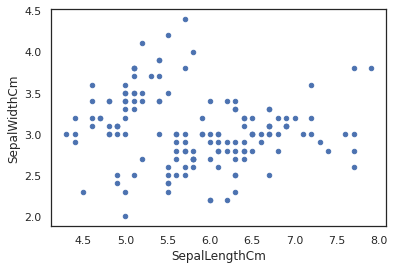

In [ ]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

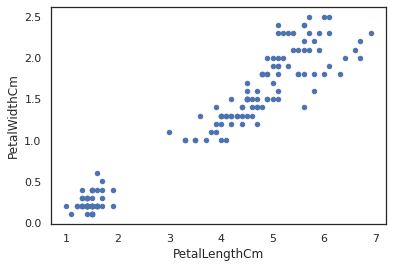

In [ ]:
iris.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")
plt.show()

##FacetGrid Plot to understand if any cluster is forming from the dataset or not.

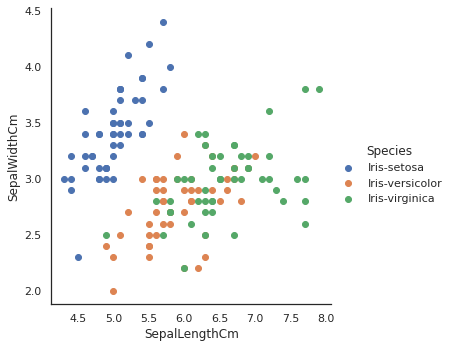

In [ ]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

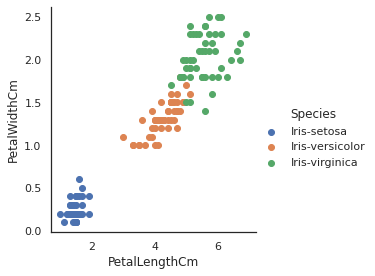

In [ ]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=4).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

##Box-Plot for visualizing any outliers that may be present in the dataset.

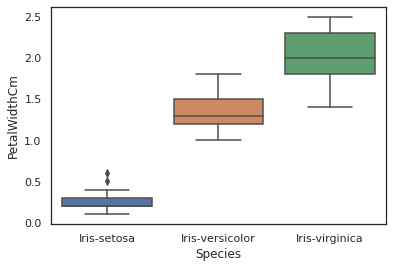

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

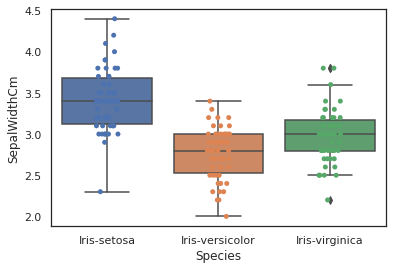

In [ ]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=iris)
ax = sns.stripplot(x="Species", y="SepalWidthCm", 
                   data=iris, jitter=True, edgecolor="gray")

##Facet-Grid Kernel Density Enstimation Plot to identify the distribution of the data

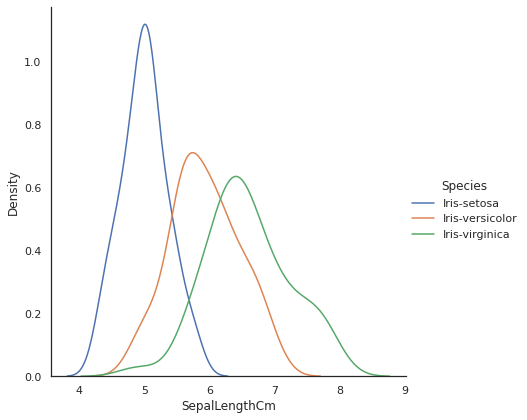

In [ ]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6).map(sns.kdeplot, "SepalLengthCm").add_legend()

##Most important of all the pairplot to understand the correlation among the features according to the classes.


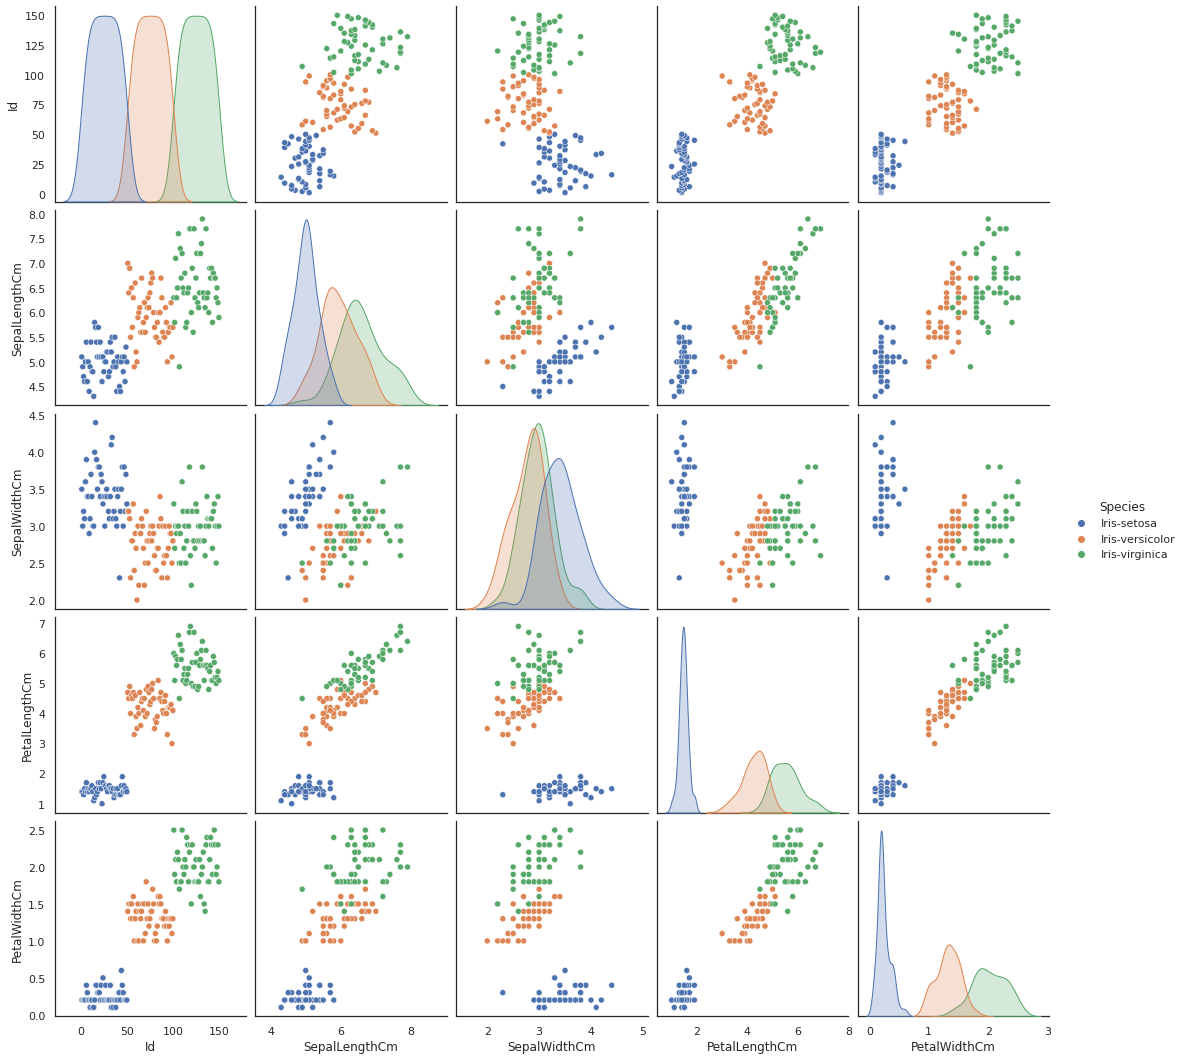

In [ ]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde")

#Data Preprocessing for the Machine Learning Algorithm

In [ ]:
features = iris.iloc[:, 1:5]

In [ ]:
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
features.shape

(150, 4)

In [ ]:
targets = iris.iloc[:, -1]

In [ ]:
targets

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
targets.shape

(150,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, 
                                                    test_size=0.2, random_state=42)

In [ ]:
import numpy as np

X_train, y_train = np.array(X_train, dtype=np.float64), np.array(y_train)

In [ ]:
X_test, y_test = np.array(X_test, dtype=np.float64), np.array(y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train.reshape((-1, 1)))
y_test_encoded = encoder.transform(y_test.reshape((-1, 1)))

In [ ]:
print("The Final Training Data Tensor shape is : {} for the features and {} for the targets.".format(X_train.shape, y_train_encoded.shape))

The Final Training Data Tensor shape is : (120, 4) for the features and (120,) for the targets.


In [ ]:
print("The Final Testing Data Tensor shape is : {} for the features and {} for the targets.".format(X_test.shape, y_test_encoded.shape))

The Final Testing Data Tensor shape is : (30, 4) for the features and (30,) for the targets.


#Machine Learning Model Designing - The K-Nearest-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from tqdm import tqdm

k_range = range(1, 101)
scores = {}
scores_list = []
for k in tqdm(k_range) :
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train_encoded)
    y_prediction = knn_model.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test_encoded, y_prediction)
    scores_list.append(metrics.accuracy_score(y_test_encoded, y_prediction))

100%|██████████| 100/100 [00:00<00:00, 604.42it/s]


Text(0, 0.5, 'Testing Accuracy')

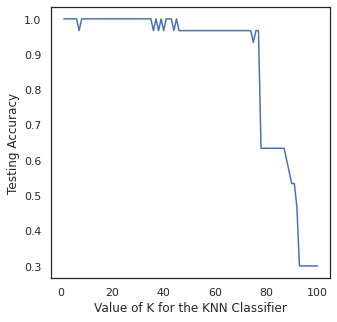

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for the KNN Classifier")
plt.ylabel("Testing Accuracy")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_encoded)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
output_prediction = knn.predict(X_test)

In [ ]:
classes = {0 : "Iris-Setosa", 1 : "Iris-Versicolor", 2 : "Iris-Verginica"}

X_new_samples = [
    [2.5, 2.555, 3.6, 4.8],
    [2.5, 3.25, 4.15, 6.3], 
    [0.3, 0.5, 1.75, 3.25],
    [0.45, 2.5, 1.6, 0.25],
    [6, 2, 5, 8],
    [2.75, 4.25, 3.15, 0.25],
    [1.25, 1.25, 1.25, 1.25]
]

y_predict = knn.predict(X_new_samples)
print([classes[y_predict[i]] for i in range(len(y_predict))])


['Iris-Verginica', 'Iris-Verginica', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Verginica', 'Iris-Setosa', 'Iris-Setosa']


In [ ]:
accuracy = metrics.accuracy_score(y_test_encoded, output_prediction)
print("The Accuracy of the Trained KNN Classifier is : {} % .".format(accuracy * 100))

The Accuracy of the Trained KNN Classifier is : 100.0 % .
